# Title: Heart Disease .....

### *Introduction*
- ...
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
set.seed(3456)
heart_data <- read_csv("data/heart.csv") |>
    mutate(target = as_factor(target))
heart_data

Rows: 1025 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [3]:
# select the columns that we want to use
heart_data_selected <- select(heart_data, trestbps, chol, target)
heart_data_selected

trestbps,chol,target
<dbl>,<dbl>,<fct>
125,212,0
140,203,0
145,174,0
⋮,⋮,⋮
110,275,0
110,254,1
120,188,0


#### *Explanation to Why These Columns are Selected*
- ...

#### *What do you expect to find?*

### *Preliminary exploratory data analysis*

In [4]:
#training data
heart_data_split <- initial_split(heart_data_selected, prop = 0.75, strata = target)
heart_data_training <- training(heart_data_split)
heart_data_training

trestbps,chol,target
<dbl>,<dbl>,<fct>
140,203,0
145,174,0
148,203,0
⋮,⋮,⋮
112,204,1
140,221,1
110,254,1


In [8]:
# mean of selected predictors
heart_data_mean <- summarize(heart_data_training, 
                             chol_mean = mean(chol), 
                             trestbps_mean = mean(trestbps))
heart_data_mean

# number of observations for each class
heart_data_observations <- group_by(heart_data_training, target) |>
    summarize(count = n())
heart_data_observations

# rows with missing data
heart_data_missing <- filter(heart_data_training, trestbps == NA, chol == NA, target == NA) |>
    count()
heart_data_missing

chol_mean,trestbps_mean
<dbl>,<dbl>
247.4805,131.6341


target,count
<fct>,<int>
0,374
1,394


n
<int>
0


In [16]:
# scaling data
heart_data_scaled <- heart_data_training |> 
 mutate(scaled_trestbps = scale(trestbps, center = TRUE), 
        scaled_chol = scale(chol, center = TRUE))
heart_data_scaled

trestbps,chol,target,scaled_trestbps,scaled_chol
<dbl>,<dbl>,<fct>,"<dbl[,1]>","<dbl[,1]>"
140,203,0,0.4800180,-0.8390289
145,174,0,0.7669082,-1.3860519
148,203,0,0.9390423,-0.8390289
⋮,⋮,⋮,⋮,⋮
112,204,1,-1.126567,-0.8201661
140,221,1,0.480018,-0.4994974
110,254,1,-1.241323,0.1229770


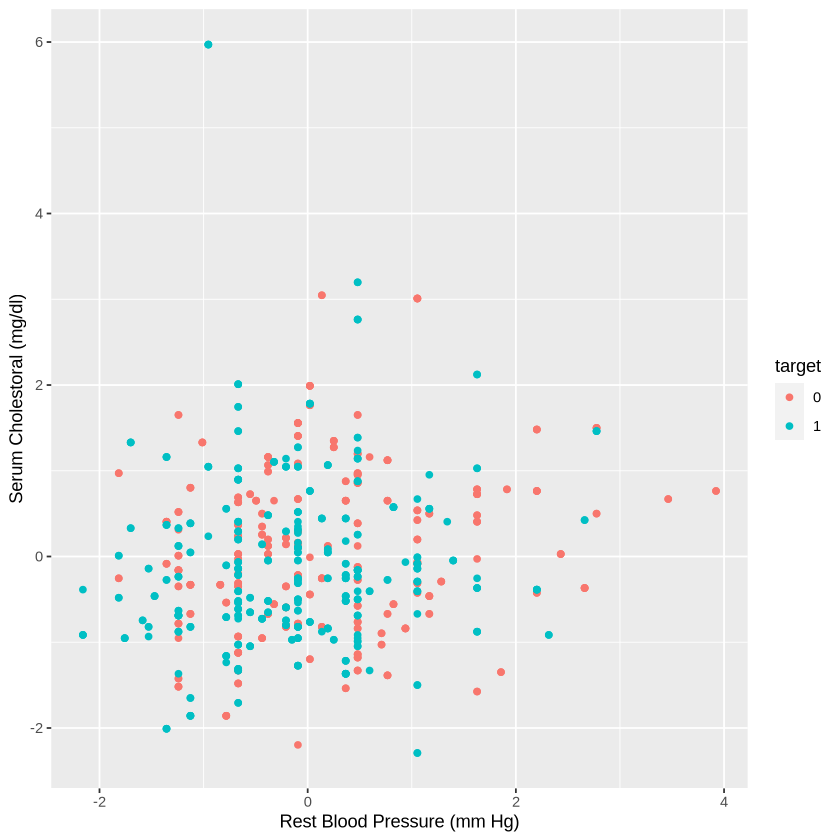

In [17]:
# Data Visualization
heart_visual <- heart_data_scaled |>
    ggplot(aes(x = scaled_trestbps, y = scaled_chol, colour = target)) +
    geom_point() +
    labs(x = "Rest Blood Pressure (mm Hg)", y = "Serum Cholestoral (mg/dl)")
heart_visual

#### why use scatterplot?

### *Methods*

### *Expected outcomes and significance*

- What impacts could such findings have?
- What future questions could this lead to?